<a href="https://colab.research.google.com/github/Parvxi/fastAPI-cofee/blob/main/SVM_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.drop(["customerID", "gender"], axis=1, inplace=True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


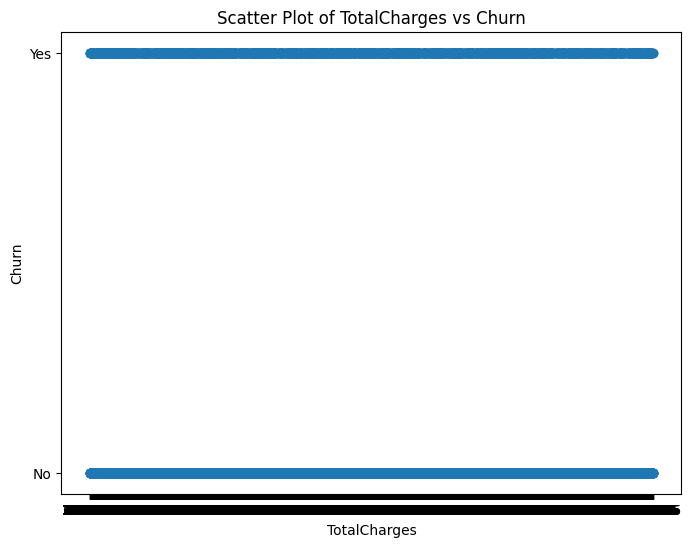

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(data['TotalCharges'], data['Churn'])
plt.title('Scatter Plot of TotalCharges vs Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.show()

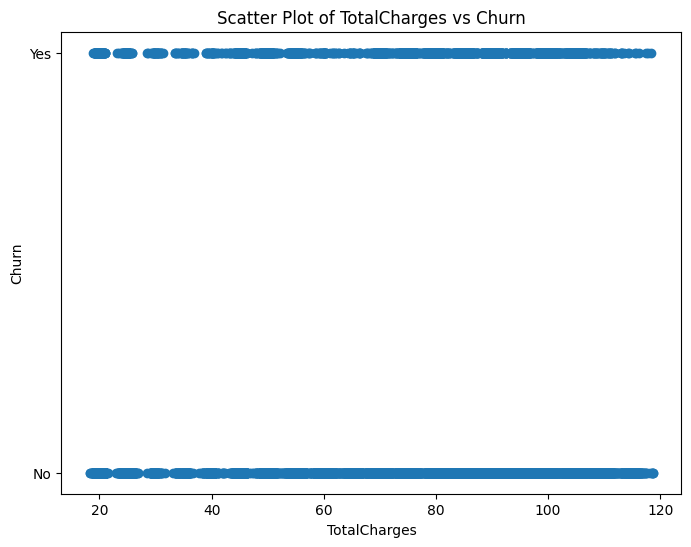

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'TotalCharges' and 'Churn' are the columns
plt.figure(figsize=(8, 6))
plt.scatter(data['MonthlyCharges'], data['Churn'])
plt.title('Scatter Plot of TotalCharges vs Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.show()


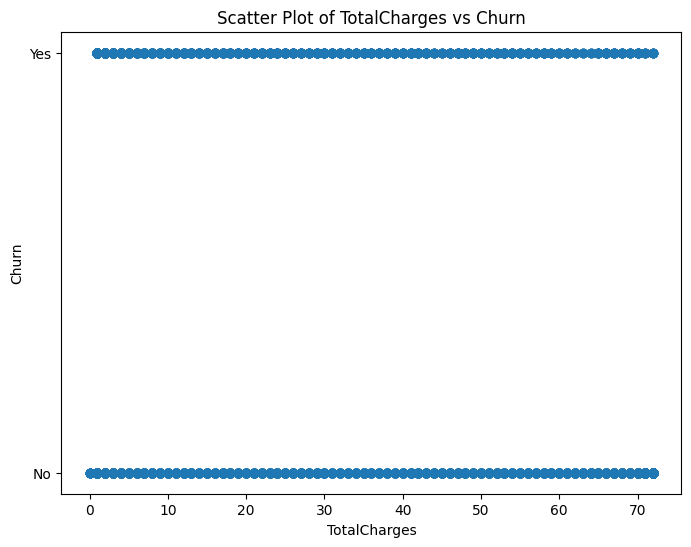

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'TotalCharges' and 'Churn' are the columns
plt.figure(figsize=(8, 6))
plt.scatter(data['tenure'], data['Churn'])
plt.title('Scatter Plot of TotalCharges vs Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.show()

In [ ]:
import pandas as pd
null_counts = data.isna().sum()
print("The Number of Missing Values in the Dataset (Nan)\n")
print(null_counts)

The Number of Missing Values in the Dataset (Nan)

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data[np.isnan(data['TotalCharges'])]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [ ]:
data.fillna(data["TotalCharges"].mean())

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
import pandas as pd
null_counts = data.isna().sum()
print("The Number of Missing Values in the Dataset After (Nan)\n")
print(null_counts)

The Number of Missing Values in the Dataset After (Nan)

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data[data['tenure'] == 0].index

Index([], dtype='int64')

In [ ]:
import pandas as pd

# From the plots, as we can see there are no Outliers to handle.

# Handling Categorical Variables
def encode_categorical_variables(df):
    for column in df.select_dtypes(include='object'):
        df[column] = pd.Categorical(df[column]).codes

# Apply the functions
encode_categorical_variables(data)

# Print the preprocessed data
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
import plotly.express as px
fig = px.histogram(data, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features and target
features = data.drop('Churn', axis=1)
target = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Print the shapes of the training and testing sets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (4922, 18)
Shape of X_test: (2110, 18)
Shape of y_train: (4922,)
Shape of y_test: (2110,)


The Accuracy is 73%, and the recall for class 1 is 0, so our calssifier is classifiying everything into class 0
That's why we need to apply gridsearch, to tune the parameters of the classifier.

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)

SVC(random_state=1)

In [ ]:
from sklearn.metrics import classification_report
# Predict the labels of the test data
predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.68      0.46      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.78      2110



In [ ]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.801 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.770 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.807 total time=   0.3s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.801 total time=   0.3s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.783 total time=   0.3s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.770 total time=   0.3s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.797 total time=   0.3s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.807 total time=   0.3s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.801 total time=   0.3s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
# Get and Print the best hyperparameters
best_params = grid.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
grid_predictions = grid.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.52      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



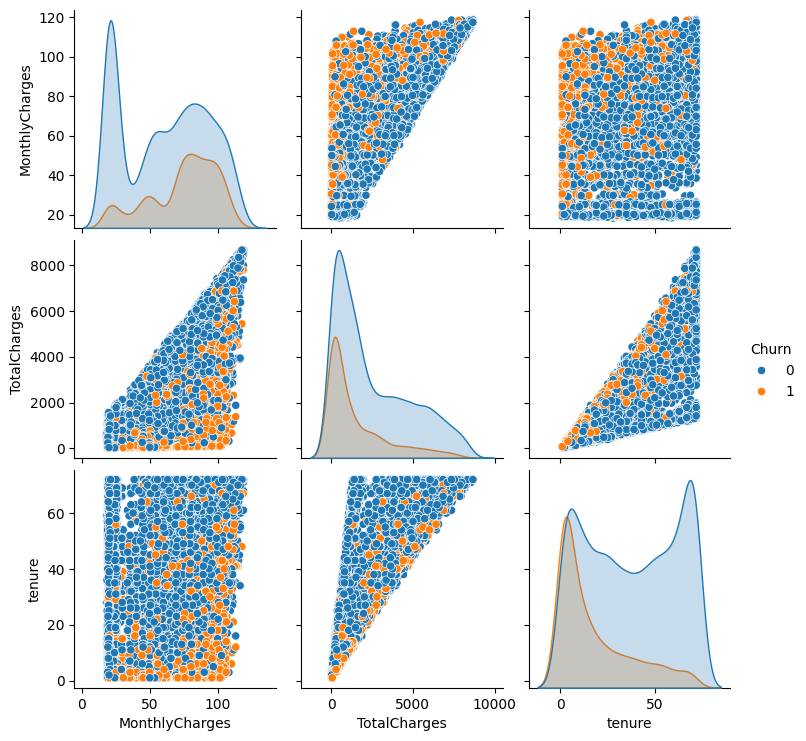

In [ ]:
import seaborn as sns
highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(data[highCorrCols], hue = 'Churn')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Transforming the dataset using PCA
X_pca = pca.fit_transform(X_train)
y = y_train
X_pca.shape, y.shape

((4922, 2), (4922,))

In [ ]:
# min and max values
xmin, xmax = X_pca[:, 0].min() - 2, X_pca[:, 0].max() + 2
ymin, ymax = X_pca[:, 1].min() - 2, X_pca[:, 1].max() + 2

# Creating a mesh region where the boundary will be plotted
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.2),
                     np.arange(ymin, ymax, 0.2))

In [ ]:
# Fitting SVM model on 2 features
grid.fit(X_pca, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.786 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.783 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.801 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.786 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.783 total time=   0.2s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.2s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.793 total time=   0.3s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.801 total time=   0.2s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.786 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

Text(0.5, 1.0, 'SVM')

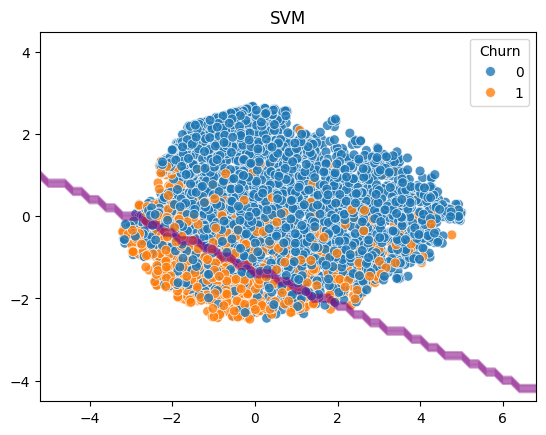

In [ ]:
# Plotting decision boundary for SVM
z2 = grid.predict(np.c_[xx.ravel(), yy.ravel()])
z2 = z2.reshape(xx.shape)

# Displaying the result
plt.contour(xx, yy, z2, alpha=0.4, colors='purple') # SVM
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train, s=50, alpha=0.8)
plt.title('SVM')